c:\Users\USER2\anaconda3\Lib\site-packages\pandas\core\arrays\masked.py:60: UserWarning: Pandas requires version '1.3.6' or newer of 'bottleneck' (version '1.3.5' currently installed).
  from pandas.core import (


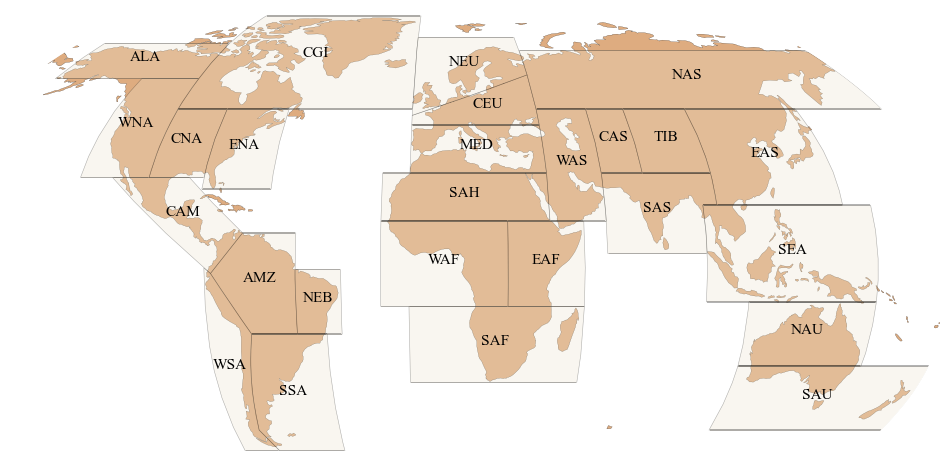

In [1]:
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
import cartopy.feature as cfeature
import geopandas as gpd
import numpy as np
import matplotlib.patches as mpatches

shapefile_path = r"shape_fiel_path"

# Read the shapefile
gdf_shapefile = gpd.read_file(shapefile_path)

indices_to_drop = [3, 27, 28, 29, 30, 31, 32]
gdf_shapefile = gdf_shapefile.drop(indices_to_drop)

unique_regions = gdf_shapefile['LAB'].unique()

fig = plt.figure(figsize=(12, 12))
ax = fig.add_subplot(1, 1, 1, projection=ccrs.Robinson())
ax.set_extent([-150, 180, -60, 90], crs=ccrs.PlateCarree())

land = cfeature.NaturalEarthFeature('physical', 'land', '110m',
                                    edgecolor='black',
                                    facecolor='#DEAC80', linewidth=0.03)
ax.add_feature(land)

for geom, lab in zip(gdf_shapefile['geometry'], gdf_shapefile['LAB']):
    color = "#ECE3CE"
    ax.add_geometries([geom], crs=ccrs.PlateCarree(), facecolor=color, edgecolor='black', linewidth=0.4, zorder=10, alpha=0.3)
    centroid = geom.centroid
    ax.text(centroid.x, centroid.y, lab, fontsize=11, ha='center', transform=ccrs.PlateCarree(), zorder=11,  fontdict={'family': 'Times New Roman'})


ax.set_frame_on(False)
ax.coastlines(linewidth=0.1)
ax.grid(True)


plt.savefig(r"save_path.png", dpi=600, bbox_inches='tight')
# Show the plot
plt.show()
